# Differential Equations Lab: The SIR Epidemic Model


## Today's Lab

#### In today's lab, you'll learn:

1. What differential equations are, including:
 - the differences between independent variables, dependent variables and derivatives in a differential equation
 - assumptions made modeling with differential equations  
 (From MAA website)  
2. To develop the SIR Model for the spread of an infectious disease, including the concepts of contact number and herd immunity;
3. To develop a version of Euler's Method for solving a system of differential equations  
 Pre-reqs:  
 The concept of derivative and the Chain Rule;  
 The concept of autonomous first-order differential equation;  
 At least surface understanding of Euler's method as a tool for generating an approximate numerical or graphical solution of a first-order equation;  
Some experience with the selected CAS.

Be aware that there are many different models that are used in mathematical epidemiology today (e.g. SI, SIS, SIR, SIRS, SEIR, SEAIR, SEIRD, and SIR with vital dynamics, along with others) and that this lab will focus specifically on the SIR model.


This lab covers the SIR definition of the MAA website located here:   
https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-introduction  
You should check out the MAA website, but not right now. Instead, let's get started!  

#### Background

A mathematical description of the spread of a disease in a population is the SIR model, which divides a fixed population of $N$ individuals into three "compartments" which may vary as a function of time, $t$:  

$S(t)$ are those susceptible but not yet infected with the disease;  
$I(t)$ is the number of infectious individuals;  
$R(t)$ are those individuals who have recovered from the disease and now have immunity to it.  

The fraction of susceptible, infectious and recovered people in the population is:   
$s(t) = \frac{S(t)}{N}$  
$i(t) = \frac{I(t)}{N}$  
$r(t) = \frac{R(t)}{N}$  

The SIR model describes the change in the population of each of these compartments in terms of two parameters, $\beta$ and $\gamma$, which are both positive constants. $\beta$ describes the effective contact rate of the disease: an infected individual comes into contact with $\beta N$ other individuals per unit time (of which the fraction that are susceptible to contracting the disease is $S/N$). $\gamma$ is the mean recovery rate: that is, $1 / \gamma$ is the mean period of time during which an infected individual can pass it on.

<img src="SIR.png"/>  

The following assumptions apply to the SIR model:  

No one is added to the susceptible group, since we are ignoring births and immigration. The only way an individual leaves the susceptible group is by becoming infected. We assume that the time-rate of change of  $S(t)$,  the number of susceptibles, depends on the number already susceptible, the number of individuals already infected, and the amount of contact between susceptibles and infecteds. In particular, suppose that each infected individual has a fixed number  $\beta$  of contacts per day that are sufficient to spread the disease. Not all these contacts are with susceptible individuals. If we assume a homogeneous mixing of the population, the fraction of these contacts that are with susceptibles is  $s(t)$.  Thus, on average, each infected individual generates  $ \beta s(t)$  new infected individuals per day. [With a large susceptible population and a relatively small infected population, we can ignore tricky counting situations such as a single susceptible encountering more than one infected in a given day.]

We also assume that a fixed fraction  $\gamma$  of the infected group will recover during any given day. This model considers deaths due to an epidemic as part of the "recovered" group. A "recovered" person can still feel miserable, and might even die later from the epidemic or complications.

From these assumptions, we get the following equations

$ \frac{dS}{dt}=- \beta SI, $  
$ \frac{dI}{dt}=\beta SI -\gamma I, $  
$ \frac{dR}{dt}=\gamma I $  

[//]: # (Should the above equations be divided by the population N? Probably not, gonna change that)

The change in the susceptible, infected, and recovered fractions of the population is given by the following equations

$ \frac{ds}{dt}=- \beta s(t) i(t), $  
$ \frac{di}{dt}=\beta s(t) i(t) - \gamma i(t), $  
$ \frac{dr}{dt}= \gamma i(t) $  

#### Below is a graph of an SIR model, feel free to play around with the parameters.

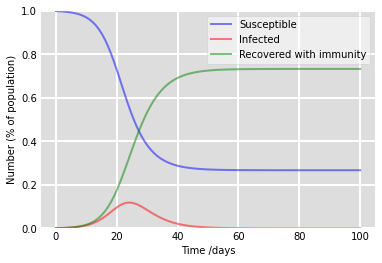

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 3/5, 1/3
# A grid of time points (in days)
t = np.linspace(0, 100, 100)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (% of population)')
ax.set_ylim(0,1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

#Credit to this website for this model: https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

#### Contact Number

We assumed that the parameters  $\beta$  and  $\gamma$  could be estimated somehow, and therefore it would be possible to generate numerical solutions of the differential equations. In fact, as we have seen, the fraction  $\gamma$  of infecteds recovering in a given day can be estimated from observation of infected individuals. Specifically,  $\gamma$  is roughly the reciprocal of the number of days an individual is sick enough to infect others. For many contagious diseases, the infectious time is approximately the same for most infecteds and is known by observation.

There is no direct way to observe  $\beta$,  but there is an indirect way. Consider the ratio of  $\beta$  to  $\gamma$:

$\frac{\beta}{\gamma} = \beta \frac{1}{\gamma} =$ the number of close contacts per day per infected times the number of days infected = the number of close contacts per infected individual.

We call this the contact number, $c$, where $c = \frac{\beta}{\gamma}$

From our previous equations, we have:  
$ \frac{ds}{dt}=- \beta s(t) i(t), $  
$ \frac{di}{dt}=\beta s(t) i(t) - \gamma i(t), $  

Dividing the second equation by the first, we have:  
$\frac{di}{ds}=\ -1+\frac{c}{s}$  
(Explain how we arrived at this step using the chain rule)

Important conclusions about this equation:  
- The only parameter that appears is  $c$,  the one we are trying to determine.  
- The equation is independent of time. That is, whatever we learn about the relationship between  $i$  and  $s$  must be true for the entire duration of the epidemic.  
- The right-hand side is an explicit function of  $s$,  which is now the independent variable.  

Show that $i(s)$ must have the form:  

$i = -s + \frac{1}{c}ln(s) + q,$ where $q$ is a constant.

And explain why $i + s - \frac{1}{c}ln(s)$ must be independent of time.

There are two times when we know (or can estimate) the values of  $i$   and  $s$: at $t = 0$  and  $t = \infty$.  For our considerations,  $i(0)$  is approximately  $0$  and  $s(0)$  is approximately  $1$.  A long time after the onset of the epidemic, we have  $i(\infty)$  approximately  $0$   again, and  $s(\infty)$  has settled to its steady state value. If there has been good reporting of the numbers who have contracted the disease, then the steady state is observable as the fraction of the population that did not get the disease.

For such an epidemic, explain why

$c=\frac{\ln\left(s_{\infty}\right)}{s_{\infty}-1}$

[Hint: Use the fact that the quantity $ i + s - \frac{1}{c}ln(s) $ is the same at  $t = 0$  and at  $t = \infty$.]
Use one of your numerical solutions to estimate the value of  $s(\infty)$. Compare your calculated value with the one you get by direct calculation from the definition,  $c = \frac{\beta}{\gamma}$.

#### Herd Immunity

Each strain of flu is a disease that confers future immunity on its sufferers. For such a disease, if almost everyone has had it, then those who have not had it are protected from getting it -- there are not enough susceptibles left in the population to allow an epidemic to get under way. This group protection is called herd immunity.  

Earlier you experimented with the relative sizes of  $\beta$  and  $\gamma$,  and you found that, if  $\beta$  is small enough relative to  $\gamma$,  then  no epidemic can develop. If the contact number  $c = \frac{\beta}{\gamma}$  is small enough, then there will be no epidemic. But another way to prevent an epidemic is to reduce the initial susceptible population artificially by inoculation.  

So, what fraction of the population must be inoculated to obtain herd immunity? Or, put another way, how small must  $s_0$  be to insure that an epidemic cannot get started? It depends on the contact number.

Explain why keeping an epidemic from getting started is the same as keeping  $\frac{di}{dt}$  negative from  $t = 0$   on.  
Write the right-hand side of the infected-fraction differential equation:  

$\frac{di}{dt}=\beta s\left(t\right)i\left(t\right)- \gamma i\left(t\right)  $

in factored form. Explain why one factor is always positive and why the sign of other factor depends on the size of  $s(t)$.
Explain why  $s(t)$  is a decreasing function, and thus has its largest value at  $t = 0$. It follows that, if $\frac{di}{dt}$ is negative at time  $0$,   then it stays negative.
Show that

$i'\left(0\right)=\left(\beta s_{0}-\gamma\right)i_{0}$

Explain why, if  $s_0$  is less than  $1/c$,   then no epidemic can develop.  


From 1912 to 1928, the contact number for measles in the U.S. was 12.8. If we assume that  $c$  is still 12.8 and that inoculation is 100% effective -- everyone inoculated obtains immunity from the disease -- what fraction of the population must be inoculated to prevent an epidemic?  

$s_0 < 1/12.8$, so at least 92.1875% of the population should be vaccinated.

Suppose the vaccine is only 95% effective. What fraction of the population would have to be inoculated to prevent a measles epidemic?

$s_0 < 1/12.8$ and 1/20 of $s_0$ is vaccinated but does not receive immunity. Similar calculation, but I think you have to multiply the total amount of people needed to be vaccinated by 21/20 to compensate? (I'm going off of the idea that if a vaccine had 50% efficacy then you would need to vaccinate twice as many people to have an equivalent immunization as a 100% effective vaccine.) The number I got was 96.796875%

[//]: # (let me know if the above problem was solved right, thanks!)

## Questions

Question 1: Explain briefly the modeling steps that lead to the SIR model

Question 2: Given a population and disease combination for which the SIR model is appropriate, what are the possible outcomes when a trace of infection is introduced into the population? How can you tell whether there will be an epidemic?

Question 3: Does "epidemic" mean that almost everyone will get the disease? If so, what keeps the spread of disease going? If not, what causes the epidemic to end before everyone gets sick?

Question 4: How can it happen that a large percentage of a population may get sick during an epidemic even though only a small percentage is sick at any one time?

Question 5: Explain briefly the key idea for finding solutions of an SIR model without finding explicit solution formulas.

Question 6: Describe briefly the meaning and significance of contact number.

Question 7: Describe briefly the meaning and significance of herd immunity. How can an inoculation program lead to herd immunity?

Question 8: The contact number for poliomyelitis in the U.S. in 1955 was 4.9. Explain why we have been able to eradicate this disease even though we cannot eradicate measles. Give a careful argument -- "smaller contact number" is an observation, not an explanation.

#### Answers

1: See the background section, but more importantly, how exactly should this be graded? More open-ended or more concrete?  
2: Possible Outcomes: epidemic or no epidemic, but also diseases can be endemic vs. non-endemic, depending on the contact number.  
3: More or less, it means "the rapid spread of disease to a large number of people in a given population within a short period of time." But to answer the question more fully, the spread of disease goes until people have developed a resistance/immunity to the disease, at which point the disease becomes either endemic (constant, like the flu/measles) or non-endemic, and dies out (e.g. polio.)  
4: Essentially, because diseases spread, and it takes time for the disease to infect a host and then others. There is a flu season, and also we have first hand experience with epidemics because of the COVID-19 pandemic.  
5: We use the euler method for numerically solving our ODE, as it is difficult to know the parameters of an epidemic a priori.
Also, I'm not sure what to use for the ODE and euler method, there are files for a bunch of them on the introduction, but there are also some other options, e.g. a lab going over all the same stuff but using a link for math.studio? I would use matlab, but the above python graph could also work, maybe?

6: Contact number: "it measures the relative contagiousness of the disease, because it tells us indirectly how many of the contacts are close enough to actually spread the disease."  
7: Herd Immunity: Reducing $s_0$ enough so that no epidemic occurs, $s_0 < 0$ for no epidemic.  
8: Might have to look into the actual numbers. I know historically that Salk invented a polio vaccine in the 1950s, so my guess is that we were able to inoculate enough people so that $s_0 < 1/4.9,$ or $s_0 <$ 20.4% of the population. However, with Measles, not only does it have a larger contact number, but I think it occurs mostly in children, especially if they have not been vaccinated. In other words, there is not herd immunity for Measles like there is for Polio. (At least in the US, other places still have these diseases endemically, which is why you might need booster shots when travelling abroad.)

I feel like I've more or less done all I can do for now, now I just need to clean up this notebook so it is presentable.

#### Sources
- Smith D. & Moore L. (2004, December)  
The SIR Model for Spread of Disease - Introduction. JOMA.  
Retrieved May 18, 2021, from https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-introduction 

- https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/